# Linear Regression

Linear regression is one of the most fundamental and widely used statistical techniques in data science. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. We will explore the simple version on this notebook.

Furthermore, we will dive into concepts such as:

- The mathematical foundations of linear regression
- How to implement it using statsmodels
- Interpretation of results
- Key concepts like OLS, R-squared, and variability decomposition
- Practical applications with real-world datasets

## Index

1. [**Linear Regression Model**](#the-linear-regression-model)


**Libraries used:**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import load_diabetes
import pandas as pd
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. The Linear Regression Model

Linear regression models the relationship between a dependent variable ($Y$) and one or more independent variables ($X$) by fitting a linear equation to the observed data.

The simple linear regression model can be represented as:

$$
Y = \beta_0 + \beta_1X + \epsilon
$$

where $Y$ is the dependent variable, $X$ is the independent variable, $\beta_0$ is the y-intercept, $\beta_1$ is the slope coefficient and $\epsilon$ is the error term (residuals). Below we generate a random example set of data and plot it.

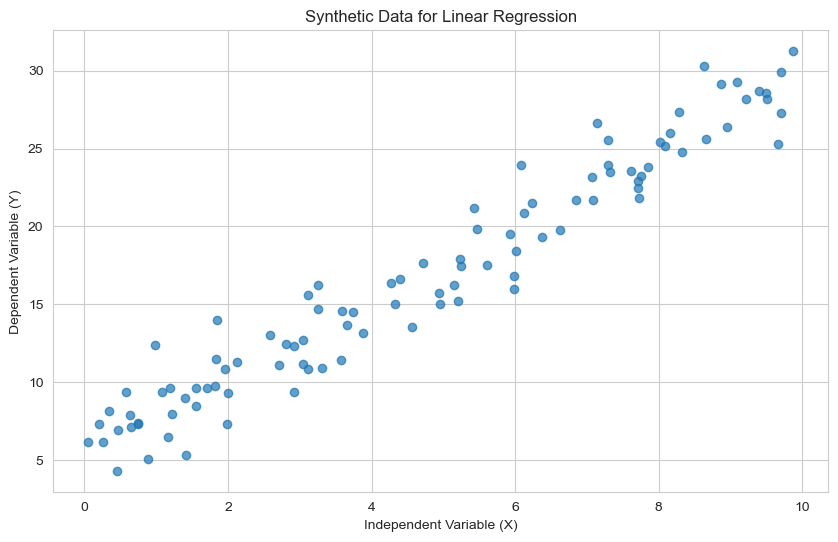

In [19]:
# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(100) * 10
true_slope = 2.5
true_intercept = 5
Y = true_intercept + true_slope * X + np.random.normal(0, 2, 100)

# Plot the data
plt.scatter(X, Y, alpha=0.7)
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('Synthetic Data for Linear Regression')
plt.show()

## 2. Correlation vs Regression

**Correlation** measures the strength and direction of the linear relationship between two variables, ranging from -1 to 1.

**Regression** quantifies how the dependent variable changes as the independent variable(s) change, providing a predictive model.

In sum, the key differences are:

- Correlation is symmetric (corr(X,Y) = corr(Y,X)), regression is not;

- Regression implies a causal relationship (X affects Y), correlation does not;

- Regression provides coefficients that can predict Y from X

In [20]:
# Calculate correlation
correlation = np.corrcoef(X, Y)[0, 1]
print(f"Correlation coefficient: {correlation:.3f}")

# Simple linear regression
X_with_const = sm.add_constant(X)  # Adds a constant term for the intercept
model = sm.OLS(Y, X_with_const)
results = model.fit()

print("\nRegression results:")
print(results.summary())

Correlation coefficient: 0.970

Regression results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1543.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           8.82e-62
Time:                        19:53:13   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


## 3. Geometrical Representation

Linear regression can be viewed geometrically as finding the projection of the observed Y vector onto the subspace spanned by the X variables.

In simple terms, we're finding the linear combination of X that comes as close as possible to Y in the p-dimensional space (where p is the number of predictors).

The residuals (ε) represent the perpendicular distance between the actual Y values and the predicted Y values (Ŷ) on the regression hyperplane.

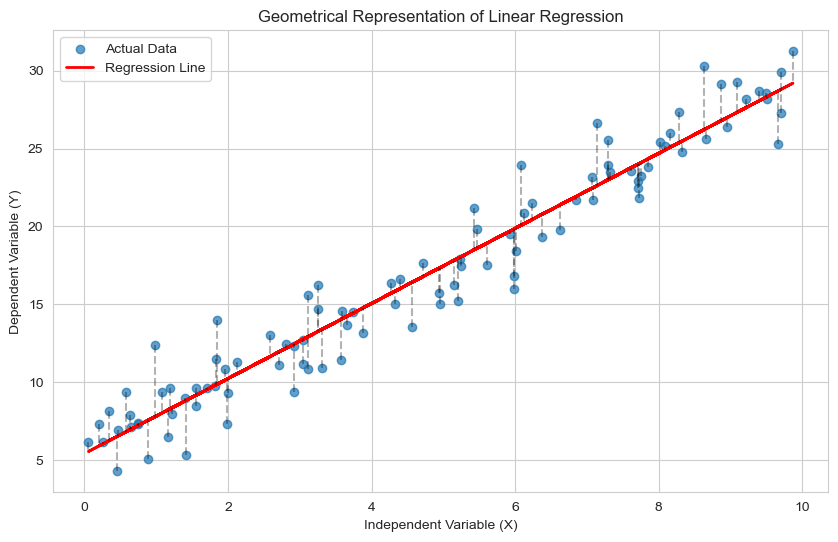

In [21]:
# Visualizing the regression line
plt.scatter(X, Y, alpha=0.7, label='Actual Data')
plt.plot(X, results.predict(X_with_const), color='red', linewidth=2, label='Regression Line')

# Add residuals
for i in range(len(X)):
    plt.plot([X[i], X[i]], [Y[i], results.predict(X_with_const)[i]], 'k--', alpha=0.3)

plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.title('Geometrical Representation of Linear Regression')
plt.legend()
plt.show()

## 4. Interpreting the Regression Table

The regression summary provides several key pieces of information:

- Coefficients (params): The estimated β values 
- Std err: Standard error of the coefficient estimates
- t-values: t-statistics for hypothesis testing (H0: β=0)
- P>|t|: p-values for the hypothesis tests
- Confidence intervals: 95% CI for the coefficients
- R-squared: Proportion of variance explained
- Adj. R-squared: R-squared adjusted for number of predictors
- F-statistic: Overall significance of the model
- Prob (F-statistic): p-value for the overall model significance
- Log-Likelihood, AIC, BIC: Model comparison metrics

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1543.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           8.82e-62
Time:                        19:53:13   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4302      0.341     15.944      0.0

## 5. Decomposition of Variability

The total variability in Y (SST) can be decomposed into:

- Variability explained by the model (SSR)
- Unexplained variability (SSE)

$$
SST= SSR + SSE
$$

where $SST = \sum{(y_i - \overline{y})^2}$ is the total sum of squares, $SSR = \sum{(\hat{y}_i - \overline{y})^2}$ is the regression sum of squares and the $SSE = \sum{(y_i - \hat{y}_i)^2}$ is the error sum of squares.

This decomposition is fundamental to ANOVA and the calculation of R-squared.

In [23]:
# Calculate the components of variability
Y_pred = results.predict(X_with_const)
Y_mean = np.mean(Y)

SST = np.sum((Y - Y_mean)**2)
SSR = np.sum((Y_pred - Y_mean)**2)
SSE = np.sum((Y - Y_pred)**2)

print(f"SST (Total Sum of Squares): {SST:.2f}")
print(f"SSR (Regression Sum of Squares): {SSR:.2f}")
print(f"SSE (Error Sum of Squares): {SSE:.2f}")
print(f"Check: SST = SSR + SSE --> {SST:.2f} = {SSR + SSE:.2f}")

SST (Total Sum of Squares): 5403.15
SSR (Regression Sum of Squares): 5080.51
SSE (Error Sum of Squares): 322.63
Check: SST = SSR + SSE --> 5403.15 = 5403.15


## 6. Ordinary Least Squares (OLS)

OLS is the most common estimation method for linear regression. It minimizes the sum of squared residuals (SSE):

$$
min \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i = 1}^{n} \epsilon_i^2
$$

The OLS estimator has several desirable properties when the Gauss-Markov assumptions are met:

1. **Unbiased**: $E[\beta] = \beta$
2. **Efficient**: Minimum variance among linear unbiased estimators
3. **Consistent**: Converges to true value as $n \to \infty$

The solution can be derived using matrix algebra:

$$
\hat{\beta} = (X^T X)^{-1}  X^Ty
$$

In [24]:
# Demonstrate OLS solution using matrix algebra
X_matrix = np.column_stack([np.ones(len(X)), X])  # Add column of ones for intercept
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y
print(f"OLS coefficients (calculated manually): {beta_hat}")

# Corrected printing of statsmodels coefficients
print(f"OLS coefficients (from statsmodels): {results.params}")

OLS coefficients (calculated manually): [5.43019232 2.40804535]
OLS coefficients (from statsmodels): [5.43019232 2.40804535]


## 7. R-squared and Model Fit

R-squared ($R^2$) measures the proportion of variance in Y explained by X:

$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$

We know that this metric ranges from 0 to 1, higher values indicate a better fit, can be misleading with many predictors and does not indicate causality or correctness of model.

In [25]:
# Calculate R-squared manually
r_squared = SSR / SST
print(f"R-squared (calculated): {r_squared:.4f}")
print(f"R-squared (from model): {results.rsquared:.4f}")

# Adjusted R-squared accounts for number of predictors
n = len(Y)
p = 1  # Number of predictors (just X in simple regression)
adj_r_squared = 1 - ( (1-r_squared)*(n-1) / (n-p-1) )
print(f"\nAdjusted R-squared (calculated): {adj_r_squared:.4f}")
print(f"Adjusted R-squared (from model): {results.rsquared_adj:.4f}")

R-squared (calculated): 0.9403
R-squared (from model): 0.9403

Adjusted R-squared (calculated): 0.9397
Adjusted R-squared (from model): 0.9397


## 8. Practical example

In [26]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore the data
print(df.head())
print("\nData description:")
print(df.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Data description:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.7619


Regression results:
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           3.47e-42
Time:                        19:54:23   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.97

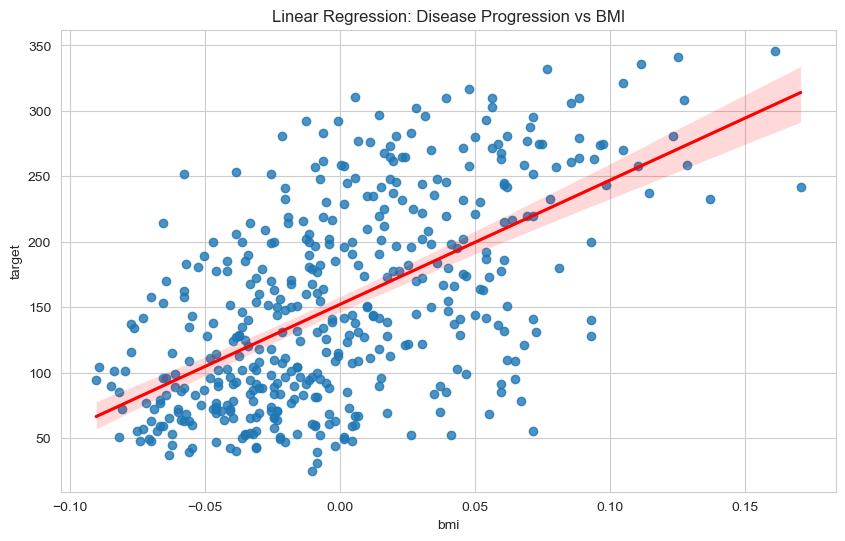

In [27]:
# Let's model disease progression (target) as a function of BMI
model = ols('target ~ bmi', data=df).fit()
print("\nRegression results:")
print(model.summary())

# Plot
sns.regplot(x='bmi', y='target', data=df, line_kws={'color': 'red'})
plt.title('Linear Regression: Disease Progression vs BMI')
plt.show()